In [268]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import datetime as dt

In [269]:
#grabbing the data using pandas
granger_data = pd.read_csv(r"C:\Users\15126\Downloads\Project 1\granger_dam.csv",skiprows=1)
granger_data

,Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches)
0,07/01/1980,NaN,101.0,73.0,0.00,0.0,0.0
1,07/02/1980,NaN,103.0,72.0,0.00,0.0,0.0
2,07/03/1980,NaN,103.0,72.0,0.00,0.0,0.0
3,07/04/1980,NaN,100.0,73.0,0.00,0.0,0.0
4,07/05/1980,NaN,98.0,71.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...
14822,04/24/2023,NaN,69.0,51.0,0.00,0.0,0.0
14823,04/25/2023,NaN,73.0,61.0,0.31,0.0,0.0
14824,04/26/2023,NaN,85.0,63.0,1.35,0.0,0.0
14825,04/27/2023,NaN,77.0,57.0,0.00,0.0,0.0


In [270]:
#grabbing key name to make sure im grabbing the correct columns
granger_data.keys()

Index(['Date', 'TAVG (Degrees Fahrenheit)', 'TMAX (Degrees Fahrenheit)',
       'TMIN (Degrees Fahrenheit)', 'PRCP (Inches)', 'SNOW (Inches)',
       'SNWD (Inches)'],
      dtype='object')

In [271]:
#filtering the data to what i want to know
granger_filtered = granger_data[["Date","TMIN (Degrees Fahrenheit)","TMAX (Degrees Fahrenheit)","PRCP (Inches)"]]
granger_filtered

,Date,TMIN (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),PRCP (Inches)
0,07/01/1980,73.0,101.0,0.00
1,07/02/1980,72.0,103.0,0.00
2,07/03/1980,72.0,103.0,0.00
3,07/04/1980,73.0,100.0,0.00
4,07/05/1980,71.0,98.0,0.00
...,...,...,...,...
14822,04/24/2023,51.0,69.0,0.00
14823,04/25/2023,61.0,73.0,0.31
14824,04/26/2023,63.0,85.0,1.35
14825,04/27/2023,57.0,77.0,0.00


In [272]:
#making sure all of the number data is the same
granger_filtered.dtypes

Date                          object
TMIN (Degrees Fahrenheit)    float64
TMAX (Degrees Fahrenheit)    float64
PRCP (Inches)                float64
dtype: object

In [273]:
#making the dates into datetime for later filtering
granger_filtered['Date'] = pd.to_datetime(granger_filtered['Date'], format='%m/%d/%Y')

C:\Users\15126\AppData\Local\Temp\ipykernel_11772\3156382951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  granger_filtered['Date'] = pd.to_datetime(granger_filtered['Date'], format='%m/%d/%Y')


In [274]:
#chedking it worked
ranger_filtered.dtypes

NameError: name 'ranger_filtered' is not defined

In [ ]:
#filtering by 2000-2020
granger_filtered = granger_filtered.loc[(granger_filtered["Date"]>="2000-01-01") & (granger_filtered["Date"]<"2021-01-01")]
granger_filtered


,Date,TMIN (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),PRCP (Inches)
7090,2000-01-01,42.0,78.0,0.00
7091,2000-01-02,44.0,78.0,0.00
7092,2000-01-03,56.0,77.0,0.00
7093,2000-01-04,35.0,69.0,0.00
7094,2000-01-05,25.0,53.0,0.00
...,...,...,...,...
14301,2020-07-27,NaN,NaN,1.19
14302,2020-07-28,NaN,NaN,0.00
14303,2020-07-29,NaN,NaN,0.00
14304,2020-07-30,NaN,NaN,0.00


In [ ]:
#checking keys on the data again for safety
granger_filtered.keys()

Index(['Date', 'TMIN (Degrees Fahrenheit)', 'TMAX (Degrees Fahrenheit)',
       'PRCP (Inches)'],
      dtype='object')

In [ ]:
#getting the average by month for the dataset
granger_mean = granger_filtered.groupby(pd.Grouper(key='Date', freq="M")).mean()
granger_mean

,TMIN (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),PRCP (Inches)
Date,,,
2000-01-31,40.838710,66.161290,0.133226
2000-02-29,47.551724,71.862069,0.048966
2000-03-31,52.068966,74.400000,0.046452
2000-04-30,55.200000,77.933333,0.073667
2000-05-31,66.967742,86.161290,0.197742
...,...,...,...
2020-03-31,56.322581,75.387097,0.130000
2020-04-30,54.230769,75.846154,0.153462
2020-05-31,64.466667,86.000000,0.082333


In [ ]:
#doing all i did above but for the other datasets
campy_mabry_data = pd.read_csv(r"C:\Users\15126\Downloads\Project 1\camp_mabry.csv",skiprows=1)
bergstrom_data = pd.read_csv(r"C:\Users\15126\Downloads\Project 1\bergstrom.csv",skiprows=1)
dripping_springs_data = pd.read_csv(r"C:\Users\15126\Downloads\Project 1\dripping_springs.csv",skiprows=1)

In [ ]:
#doing all i did above but for the other datasets
campy_mabry_filtered = campy_mabry_data[["Date","TMIN (Degrees Fahrenheit)","TMAX (Degrees Fahrenheit)","PRCP (Inches)"]]
bergstrom_filtered = bergstrom_data[["Date","TMIN (Degrees Fahrenheit)","TMAX (Degrees Fahrenheit)","PRCP (Inches)"]]
dripping_springs_filtered = dripping_springs_data[["Date","TMIN (Degrees Fahrenheit)","TMAX (Degrees Fahrenheit)","PRCP (Inches)"]]

In [ ]:
#doing all i did above but for the other datasets
campy_mabry_filtered['Date'] = pd.to_datetime(campy_mabry_filtered['Date'], format='%m/%d/%Y')
bergstrom_filtered['Date'] = pd.to_datetime(bergstrom_filtered['Date'], format='%m/%d/%Y')
dripping_springs_filtered['Date'] = pd.to_datetime(dripping_springs_filtered['Date'], format='%m/%d/%Y')

C:\Users\15126\AppData\Local\Temp\ipykernel_11772\2277615400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campy_mabry_filtered['Date'] = pd.to_datetime(campy_mabry_filtered['Date'], format='%m/%d/%Y')
C:\Users\15126\AppData\Local\Temp\ipykernel_11772\2277615400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bergstrom_filtered['Date'] = pd.to_datetime(bergstrom_filtered['Date'], format='%m/%d/%Y')
C:\Users\15126\AppData\Local\Temp\ipykernel_11772\2277615400.py:3: SettingWithCopyWarning: 
A value 

In [ ]:
#doing all i did above but for the other datasets
campy_mabry_filtered = campy_mabry_filtered.loc[(campy_mabry_filtered["Date"]>="2000-01-01") & (campy_mabry_filtered["Date"]<"2021-01-01")]
bergstrom_filtered = bergstrom_filtered.loc[(bergstrom_filtered["Date"]>="2000-01-01") & (bergstrom_filtered["Date"]<"2021-01-01")]
dripping_springs_filtered = dripping_springs_filtered.loc[(dripping_springs_filtered["Date"]>="2000-01-01") & (dripping_springs_filtered["Date"]<"2021-01-01")]

In [ ]:
#this dataset had a problem going to float so i forced it to float64 for ease of filtering later on
dripping_springs_filtered["TMAX (Degrees Fahrenheit)"] = dripping_springs_filtered["TMAX (Degrees Fahrenheit)"].astype('float')
dripping_springs_filtered

,Date,TMIN (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),PRCP (Inches)
5509,2000-01-01,40.0,73.0,0.00
5510,2000-01-02,62.0,70.0,0.00
5511,2000-01-03,49.0,71.0,0.00
5512,2000-01-04,34.0,62.0,0.00
5513,2000-01-05,21.0,58.0,0.00
...,...,...,...,...
13145,2020-12-27,53.0,72.0,0.00
13146,2020-12-28,51.0,72.0,0.00
13147,2020-12-29,59.0,72.0,0.05
13148,2020-12-30,46.0,69.0,0.00


In [ ]:
#filtering by month for the average
camp_mabry_mean = campy_mabry_filtered.groupby(pd.Grouper(key='Date', freq="M")).mean()
bergstrom_mean = bergstrom_filtered.groupby(pd.Grouper(key='Date', freq="M")).mean()
dripping_springs_mean = dripping_springs_filtered.groupby(pd.Grouper(key='Date', freq="M")).mean()

In [ ]:
#filtering by month for the median
camp_mabry_median = campy_mabry_filtered.groupby(pd.Grouper(key='Date', freq="M")).median()
bergstrom_median = bergstrom_filtered.groupby(pd.Grouper(key='Date', freq="M")).median()
dripping_springs_median = dripping_springs_filtered.groupby(pd.Grouper(key='Date', freq="M")).median()
granger_median = granger_filtered.groupby(pd.Grouper(key='Date', freq="M")).median()

In [ ]:
#filtering by month for the max
camp_mabry_max = campy_mabry_filtered.groupby(pd.Grouper(key='Date', freq="M")).max()
bergstrom_max = bergstrom_filtered.groupby(pd.Grouper(key='Date', freq="M")).max()
dripping_springs_max = dripping_springs_filtered.groupby(pd.Grouper(key='Date', freq="M")).max()
granger_max = granger_filtered.groupby(pd.Grouper(key='Date', freq="M")).max()

In [ ]:
#filtering by month for the min
camp_mabry_min = campy_mabry_filtered.groupby(pd.Grouper(key='Date', freq="M")).min()
bergstrom_min = bergstrom_filtered.groupby(pd.Grouper(key='Date', freq="M")).min()
dripping_springs_min = dripping_springs_filtered.groupby(pd.Grouper(key='Date', freq="M")).min()
granger_min = granger_filtered.groupby(pd.Grouper(key='Date', freq="M")).min()

In [ ]:
#renaming the coloumns for ease of understanding
granger_filtered = granger_filtered.rename(columns={"TMAX (Degrees Fahrenheit)":"TMAX(GR)",
                                                     "TMIN (Degrees Fahrenheit)":"TMIN(GR)",
                                                     "PRCP (Inches)":"PRCP(GR)"})
granger_filtered

,Date,TMIN(GR),TMAX(GR),PRCP(GR)
7090,2000-01-01,42.0,78.0,0.00
7091,2000-01-02,44.0,78.0,0.00
7092,2000-01-03,56.0,77.0,0.00
7093,2000-01-04,35.0,69.0,0.00
7094,2000-01-05,25.0,53.0,0.00
...,...,...,...,...
14301,2020-07-27,NaN,NaN,1.19
14302,2020-07-28,NaN,NaN,0.00
14303,2020-07-29,NaN,NaN,0.00
14304,2020-07-30,NaN,NaN,0.00


In [ ]:
#renaming the coloumns for ease of understanding
dripping_springs_filtered = dripping_springs_filtered.rename(columns={"TMAX (Degrees Fahrenheit)":"TMAX(DRS)",
                                                     "TMIN (Degrees Fahrenheit)":"TMIN(DRS)",
                                                     "PRCP (Inches)":"PRCP(DRS)"})
dripping_springs_filtered

,Date,TMIN(DRS),TMAX(DRS),PRCP(DRS)
5509,2000-01-01,40.0,73.0,0.00
5510,2000-01-02,62.0,70.0,0.00
5511,2000-01-03,49.0,71.0,0.00
5512,2000-01-04,34.0,62.0,0.00
5513,2000-01-05,21.0,58.0,0.00
...,...,...,...,...
13145,2020-12-27,53.0,72.0,0.00
13146,2020-12-28,51.0,72.0,0.00
13147,2020-12-29,59.0,72.0,0.05
13148,2020-12-30,46.0,69.0,0.00


In [ ]:
#renaming the coloumns for ease of understanding
bergstrom_filtered = bergstrom_filtered.rename(columns={"TMAX (Degrees Fahrenheit)":"TMAX(BS)",
                                                     "TMIN (Degrees Fahrenheit)":"TMIN(BS)",
                                                     "PRCP (Inches)":"PRCP(BS)"})
bergstrom_filtered

,Date,TMIN(BS),TMAX(BS),PRCP(BS)
10183,2000-01-01,33.0,78.0,0.00
10184,2000-01-02,59.0,76.0,0.00
10185,2000-01-03,51.0,73.0,0.00
10186,2000-01-04,22.0,56.0,0.00
10187,2000-01-05,14.0,61.0,0.00
...,...,...,...,...
17849,2020-12-27,36.0,78.0,0.00
17850,2020-12-28,45.0,78.0,0.00
17851,2020-12-29,63.0,78.0,0.02
17852,2020-12-30,45.0,74.0,0.47


In [ ]:
#renaming the coloumns for ease of understanding
campy_mabry_filtered = campy_mabry_filtered.rename(columns={"TMAX (Degrees Fahrenheit)":"TMAX(CM)",
                                                     "TMIN (Degrees Fahrenheit)":"TMIN(CM)",
                                                     "PRCP (Inches)":"PRCP(CM)"})
campy_mabry_filtered

,Date,TMIN(CM),TMAX(CM),PRCP(CM)
22494,2000-01-01,42.0,76.0,0.00
22495,2000-01-02,63.0,74.0,0.00
22496,2000-01-03,50.0,71.0,0.00
22497,2000-01-04,32.0,55.0,0.00
22498,2000-01-05,27.0,60.0,0.00
...,...,...,...,...
30160,2020-12-27,47.0,77.0,0.00
30161,2020-12-28,56.0,75.0,0.00
30162,2020-12-29,63.0,77.0,0.00
30163,2020-12-30,44.0,75.0,1.45


In [ ]:
#creating a combined dataset to see the overall regional statistics
greater_austin_df = campy_mabry_filtered.merge(dripping_springs_filtered,on='Date').merge(bergstrom_filtered,on='Date').merge(granger_filtered,on='Date',how="outer")
greater_austin_df

,Date,TMIN(CM),TMAX(CM),PRCP(CM),TMIN(DRS),TMAX(DRS),PRCP(DRS),TMIN(BS),TMAX(BS),PRCP(BS),TMIN(GR),TMAX(GR),PRCP(GR)
0,2000-01-01,42.0,76.0,0.00,40.0,73.0,0.00,33.0,78.0,0.00,42.0,78.0,0.0
1,2000-01-02,63.0,74.0,0.00,62.0,70.0,0.00,59.0,76.0,0.00,44.0,78.0,0.0
2,2000-01-03,50.0,71.0,0.00,49.0,71.0,0.00,51.0,73.0,0.00,56.0,77.0,0.0
3,2000-01-04,32.0,55.0,0.00,34.0,62.0,0.00,22.0,56.0,0.00,35.0,69.0,0.0
4,2000-01-05,27.0,60.0,0.00,21.0,58.0,0.00,14.0,61.0,0.00,25.0,53.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7636,2020-12-27,47.0,77.0,0.00,53.0,72.0,0.00,36.0,78.0,0.00,NaN,NaN,NaN
7637,2020-12-28,56.0,75.0,0.00,51.0,72.0,0.00,45.0,78.0,0.00,NaN,NaN,NaN
7638,2020-12-29,63.0,77.0,0.00,59.0,72.0,0.05,63.0,78.0,0.02,NaN,NaN,NaN
7639,2020-12-30,44.0,75.0,1.45,46.0,69.0,0.00,45.0,74.0,0.47,NaN,NaN,NaN


In [ ]:
greater_austin_df.keys()

Index(['Date', 'TMIN(CM)', 'TMAX(CM)', 'PRCP(CM)', 'TMIN(DRS)', 'TMAX(DRS)',
       'PRCP(DRS)', 'TMIN(BS)', 'TMAX(BS)', 'PRCP(BS)', 'TMIN(GR)', 'TMAX(GR)',
       'PRCP(GR)'],
      dtype='object')

In [ ]:
#filtering for precipitation data
greater_atx_prec = greater_austin_df[["Date","PRCP(CM)","PRCP(DRS)","PRCP(BS)","PRCP(GR)"]]
greater_atx_prec

,Date,PRCP(CM),PRCP(DRS),PRCP(BS),PRCP(GR)
0,2000-01-01,0.00,0.00,0.00,0.0
1,2000-01-02,0.00,0.00,0.00,0.0
2,2000-01-03,0.00,0.00,0.00,0.0
3,2000-01-04,0.00,0.00,0.00,0.0
4,2000-01-05,0.00,0.00,0.00,0.0
...,...,...,...,...,...
7636,2020-12-27,0.00,0.00,0.00,NaN
7637,2020-12-28,0.00,0.00,0.00,NaN
7638,2020-12-29,0.00,0.05,0.02,NaN
7639,2020-12-30,1.45,0.00,0.47,NaN


In [ ]:
#filtering for the max
greater_atx_max = greater_austin_df[["Date","TMAX(CM)","TMAX(DRS)","TMAX(BS)","TMAX(GR)"]]
greater_atx_max

,Date,TMAX(CM),TMAX(DRS),TMAX(BS),TMAX(GR)
0,2000-01-01,76.0,73.0,78.0,78.0
1,2000-01-02,74.0,70.0,76.0,78.0
2,2000-01-03,71.0,71.0,73.0,77.0
3,2000-01-04,55.0,62.0,56.0,69.0
4,2000-01-05,60.0,58.0,61.0,53.0
...,...,...,...,...,...
7636,2020-12-27,77.0,72.0,78.0,NaN
7637,2020-12-28,75.0,72.0,78.0,NaN
7638,2020-12-29,77.0,72.0,78.0,NaN
7639,2020-12-30,75.0,69.0,74.0,NaN


In [297]:
#filtering for the min
greater_atx_min = greater_austin_df[["Date","TMIN(CM)","TMIN(DRS)","TMIN(BS)","TMIN(GR)"]]
greater_atx_min

,Date,TMIN(CM),TMIN(DRS),TMIN(BS),TMIN(GR)
0,2000-01-01,42.0,40.0,33.0,42.0
1,2000-01-02,63.0,62.0,59.0,44.0
2,2000-01-03,50.0,49.0,51.0,56.0
3,2000-01-04,32.0,34.0,22.0,35.0
4,2000-01-05,27.0,21.0,14.0,25.0
...,...,...,...,...,...
7636,2020-12-27,47.0,53.0,36.0,NaN
7637,2020-12-28,56.0,51.0,45.0,NaN
7638,2020-12-29,63.0,59.0,63.0,NaN
7639,2020-12-30,44.0,46.0,45.0,NaN


In [ ]:
#getting overall mean
greater_atx_prec_mean = greater_atx_prec.groupby(pd.Grouper(key='Date', freq="M")).mean()
greater_atx_prec_mean['mean'] = greater_atx_prec_mean.iloc[:, 1:4].mean(axis=1)
greater_atx_prec_mean.dropna()
gatxp = greater_atx_prec_mean['mean']
greater_atx_prec_mean

,PRCP(CM),PRCP(DRS),PRCP(BS),PRCP(GR),mean
Date,,,,,
2000-01-31,0.091935,0.091613,0.119032,0.133226,0.114624
2000-02-29,0.060345,0.069310,0.044138,0.048966,0.054138
2000-03-31,0.036774,0.040968,0.029677,0.046452,0.039032
2000-04-30,0.080000,0.075000,0.060667,0.073667,0.069778
2000-05-31,0.104839,0.121613,0.154194,0.197742,0.157849
...,...,...,...,...,...
2020-08-31,0.040323,0.054839,0.024839,NaN,0.039839
2020-09-30,0.198667,0.157667,0.220667,NaN,0.189167
2020-10-31,0.011290,0.015161,0.010968,NaN,0.013065


In [ ]:
#getting overall median
greater_atx_prec_median = greater_atx_prec.groupby(pd.Grouper(key='Date', freq="M")).median()
greater_atx_prec_median['median'] = greater_atx_prec_median.iloc[:, 1:4].median(axis=1)
greater_atx_prec_median

,PRCP(CM),PRCP(DRS),PRCP(BS),PRCP(GR),median
Date,,,,,
2000-01-31,0.0,0.0,0.0,0.0,0.0
2000-02-29,0.0,0.0,0.0,0.0,0.0
2000-03-31,0.0,0.0,0.0,0.0,0.0
2000-04-30,0.0,0.0,0.0,0.0,0.0
2000-05-31,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2020-08-31,0.0,0.0,0.0,NaN,0.0
2020-09-30,0.0,0.0,0.0,NaN,0.0
2020-10-31,0.0,0.0,0.0,NaN,0.0


In [ ]:
greater_atx_max.dtypes

Date         datetime64[ns]
TMAX(CM)            float64
TMAX(DRS)           float64
TMAX(BS)            float64
TMAX(GR)            float64
dtype: object

In [295]:
#getting overall max
greater_atx_max_mean = greater_atx_max.groupby(pd.Grouper(key='Date', freq="M")).mean()
greater_atx_max_mean['mean'] = greater_atx_max_mean.iloc[:, 1:4].mean(axis=1)
greater_atx_max_mean

,TMAX(CM),TMAX(DRS),TMAX(BS),TMAX(GR),mean
Date,,,,,
2000-01-31,65.612903,65.806452,65.870968,66.161290,65.946237
2000-02-29,73.103448,72.068966,72.758621,71.862069,72.229885
2000-03-31,76.677419,76.290323,76.000000,74.400000,75.563441
2000-04-30,80.700000,79.800000,79.900000,77.933333,79.211111
2000-05-31,88.903226,87.838710,87.903226,86.161290,87.301075
...,...,...,...,...,...
2020-08-31,102.548387,97.290323,100.419355,NaN,98.854839
2020-09-30,87.433333,83.900000,86.800000,NaN,85.350000
2020-10-31,84.225806,79.935484,83.580645,NaN,81.758065


In [ ]:
#getting overall min
greater_atx_min_mean = greater_atx_min.groupby(pd.Grouper(key='Date', freq="M")).mean()
greater_atx_min_mean['mean'] = greater_atx_min_mean.iloc[:, 1:4].mean(axis=1)
greater_atx_min_mean

,TMIN(CM),TMIN(DRS),TMIN(BS),TMIN(GR),mean
Date,,,,,
2000-01-31,45.064516,41.741935,39.096774,40.838710,40.559140
2000-02-29,51.103448,48.620690,46.103448,47.551724,47.425287
2000-03-31,55.870968,53.741935,51.419355,52.068966,52.410085
2000-04-30,59.933333,56.766667,54.500000,55.200000,55.488889
2000-05-31,69.290323,67.354839,67.741935,66.967742,67.354839
...,...,...,...,...,...
2020-08-31,76.451613,72.000000,73.677419,NaN,72.838710
2020-09-30,69.033333,65.266667,67.233333,NaN,66.250000
2020-10-31,59.290323,55.580645,55.645161,NaN,55.612903


In [293]:
#getting the average temperature for the region
ave_temp_df = (greater_atx_max_mean['mean'] + greater_atx_min_mean['mean'])/2
greater_atx_max_mean['average'] = ave_temp_df
greater_atx_max_mean

,TMAX(CM),TMAX(DRS),TMAX(BS),TMAX(GR),mean,average
Date,,,,,,
2000-01-31,65.612903,65.806452,65.870968,66.161290,65.946237,53.252688
2000-02-29,73.103448,72.068966,72.758621,71.862069,72.229885,59.827586
2000-03-31,76.677419,76.290323,76.000000,74.400000,75.563441,63.986763
2000-04-30,80.700000,79.800000,79.900000,77.933333,79.211111,67.350000
2000-05-31,88.903226,87.838710,87.903226,86.161290,87.301075,77.327957
...,...,...,...,...,...,...
2020-08-31,102.548387,97.290323,100.419355,NaN,98.854839,85.846774
2020-09-30,87.433333,83.900000,86.800000,NaN,85.350000,75.800000
2020-10-31,84.225806,79.935484,83.580645,NaN,81.758065,68.685484


In [ ]:
#getting nino/nina data to see what happened within that year comparatively
NinoNina_df = pd.read_excel(r"C:\Users\15126\Downloads\Project 1\Nino_Nina_Timeline.xlsx")
NinoNina_filtered_date_df=NinoNina_df.loc[NinoNina_df['Year']>=2000]
NinoNina_filtered_date_df
Strength=[]
for x in range(len(NinoNina_filtered_date_df.index)):
    
    if NinoNina_filtered_date_df.iloc[x,1]=="Nina":
        if NinoNina_filtered_date_df.iloc[x,2]=="Weak":
                Strength.append(-1)
        elif NinoNina_filtered_date_df.iloc[x,2]=="Moderate":
                Strength.append(-2)                        
        elif NinoNina_filtered_date_df.iloc[x,2]=="Strong":
                Strength.append(-3)                           
        elif NinoNina_filtered_date_df.iloc[x,2]=="Very Strong":
                Strength.append(-4)                                                            
    elif NinoNina_filtered_date_df.iloc[x,1]=="Nino":
        if NinoNina_filtered_date_df.iloc[x,2]=="Weak":
                Strength.append(1)
        elif NinoNina_filtered_date_df.iloc[x,2]=="Moderate":
                Strength.append(2)                        
        elif NinoNina_filtered_date_df.iloc[x,2]=="Strong":
                Strength.append(3)                           
        elif NinoNina_filtered_date_df.iloc[x,2]=="Very Strong":
                Strength.append(4)
    elif NinoNina_filtered_date_df.iloc[x,1]=="None":
           Strength.append(0)
NinoNina_filtered_date_df['Intensity']=Strength
NinoNina_filtered_date_df.head()

C:\Users\15126\AppData\Local\Temp\ipykernel_11772\1399458784.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NinoNina_filtered_date_df['Intensity']=Strength


,Year,Effect,Strength,Intensity
48,2000,Nina,Weak,-1
49,2001,None,NaN,0
50,2002,Nino,Moderate,2
51,2003,None,NaN,0
52,2004,Nino,Weak,1


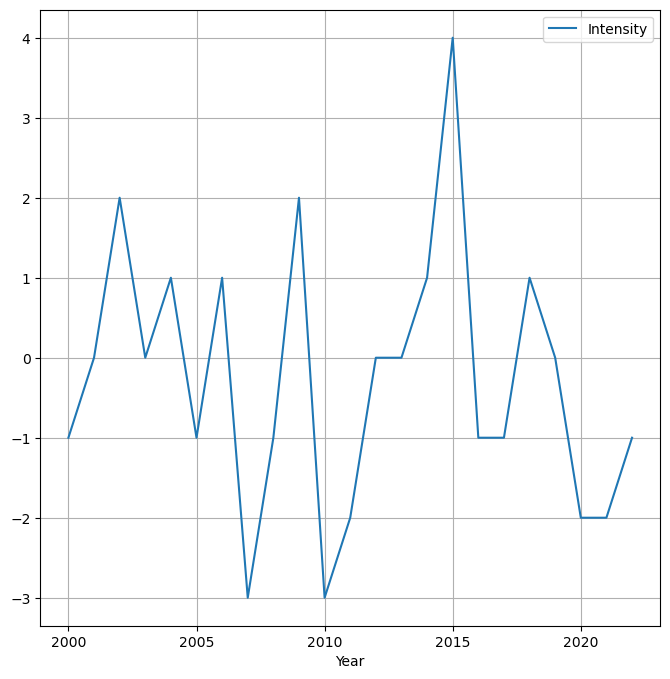

In [287]:
ella_handle = NinoNina_filtered_date_df.plot(kind="line", y="Intensity", x="Year", grid=True, figsize=(8,8),)

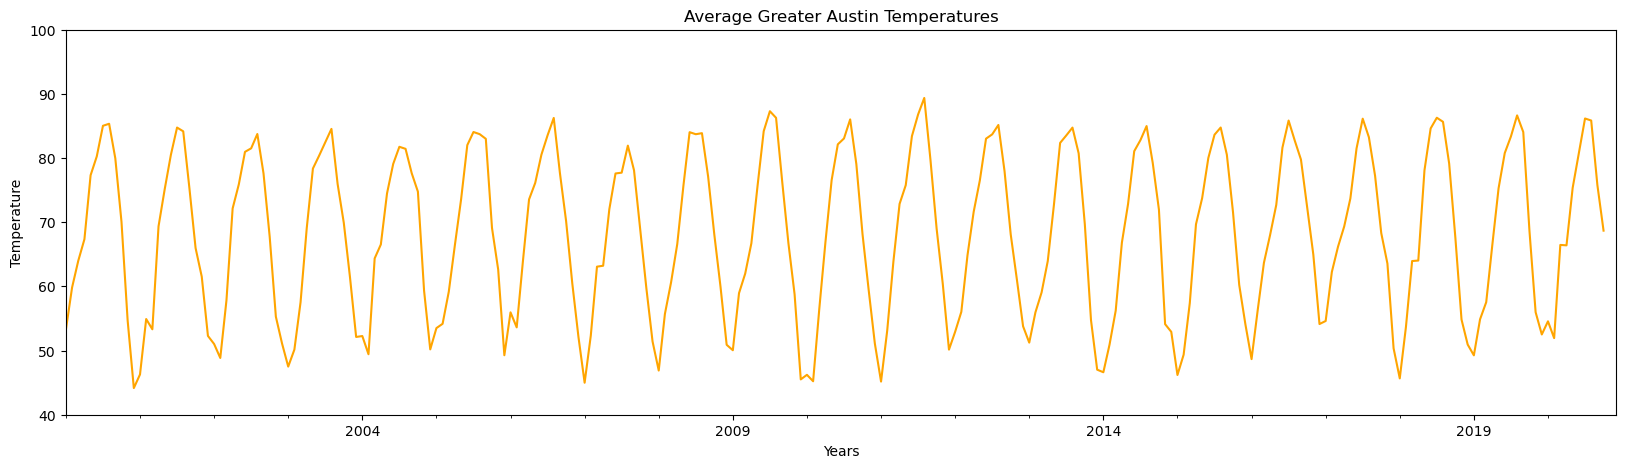

In [288]:
average_handle = ave_temp_df.plot(kind="line",figsize=(20,5), color=["orange"],title="Average Greater Austin Temperatures",
                 xlabel="Years",
                 ylabel="Temperature",
                 ylim=(40,100),
                )
plt.show()

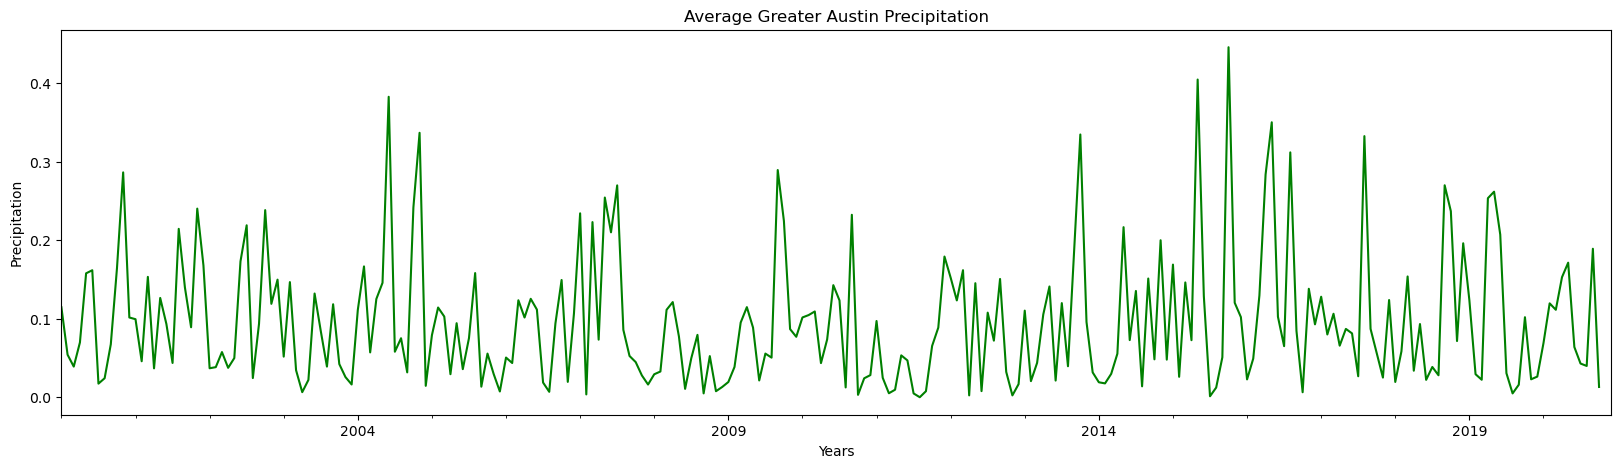

In [289]:
greater_prec_handle = gatxp.plot(kind="line",figsize=(20,5), color=["green"],title="Average Greater Austin Precipitation",
                 xlabel="Years",
                 ylabel="Precipitation"
                )

plt.show()

ValueError: x and y must have same first dimension, but have shapes (7641,) and (252,)

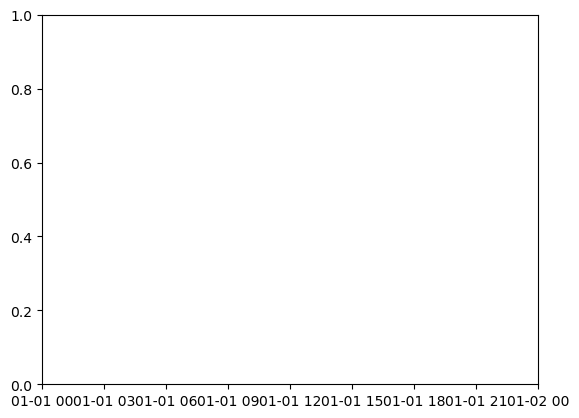

In [290]:
fig, ax1 = plt.subplots()


ax1.plot(greater_atx_max['Date'],greater_atx_max_mean['average'], label="Average Temperature",color='blue')
ax1.set_ylabel('Average Greater Austin Temperature')
ax2 = ax1.twinx()
ax2.plot(NinoNina_filtered_date_df['Year'],NinoNina_filtered_date_df['Intensity'], label="Nino/Nina Intensity",color="red")
ax2.set_ylabel('Nino/Nina Intensity')

ax1.set_xlabel('Year')
legend1 = ax1.legend(loc='upper right',bbox_to_anchor=(1.450, 1))
legend2 = ax2.legend(loc='upper right',bbox_to_anchor=(1.450, 0.9))
# Combine the legends